# Estandarizacion

Xescalada = (X - Xmedia)/Xstd

La estandarización de conjuntos de datos es un requisito común para muchos estimadores de aprendizaje automático implementados en scikit-learn; podrían comportarse mal si las características individuales no se parecen más o menos a los datos estándar distribuidos normalmente: gaussiana con ***media cero*** y ***varianza unitaria*** .

Dentro del modulo de scikit-learn para el procesamiento de datos (preprocessing) existe un metodo llamado scale que sirve para estandarizar un conjunto de datos a lo largo de cualquier eje

## Primera manera preprocessing.scale

In [23]:
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt

In [11]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
X_train.ndim # Numero de dimenciones

2

In [12]:
x_scaled = preprocessing.scale(X_train)
x_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [13]:
# Veamos si la media es cercana a cero
x_scaled.mean()

4.9343245538895844e-17

In [14]:
# Veamos si el valor de la varianza es uno
x_scaled.var()

1.0

## Ejemplo
Supongamos que tenemos datos sobre la cantidad de personas que asiste a un estadio a ver un partido de futbol, las fechas son las ultimas jornadas, de cuartos de final a final y por ultimo inicios de temporada.

In [24]:
x = [10000, 11000, 12000, 13000, 11000, 20000, 40000, 30000, 15000, 10000]
x

[10000, 11000, 12000, 13000, 11000, 20000, 40000, 30000, 15000, 10000]

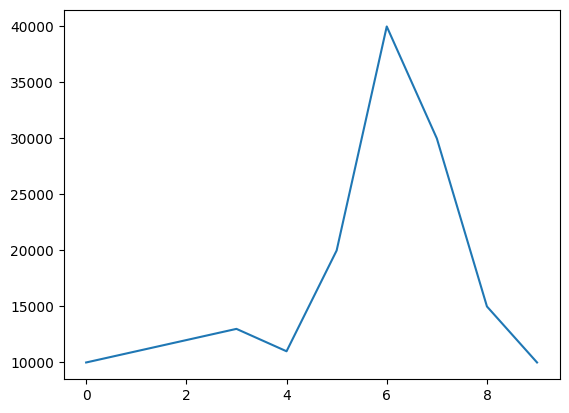

In [25]:
plt.plot(x)

In [26]:
# Lo estandarizamos
x_scaled2 = preprocessing.scale(x)

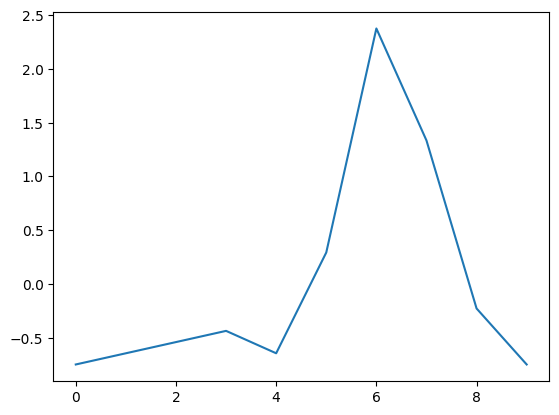

In [28]:
plt.plot(x_scaled2) # Observa los valores 

Observa que ahora tenemos valores negativos, ademas de que los valores anormalmente grandes ya no tienen tanta relevancia por el rango que existe ahora del numero minimo al mas grande. Hay que considerar como son nuestros datos para poder hacer esto ya que podrias terminar distorcinando tus datos.

## Segunda manera preprocessing.StandarScaler
Estandariza las caracteristicas eliminando la media y escalando la varianza a la unidad

In [15]:
scaler = preprocessing.StandardScaler()

In [16]:
fitted_scaler = scaler.fit(X_train)
fitted_scaler

StandardScaler()

In [17]:
fitted_scaler.mean_ # media de cada columna

array([1.        , 0.        , 0.33333333])

In [19]:
X_scaled_st = fitted_scaler.transform(X_train)
X_scaled_st

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [20]:
X_scaled_st.mean() # La media es cercana a 0?

4.9343245538895844e-17

In [21]:
X_scaled_st.var() # La varianza es unitaria?

1.0

## Escalado de datos en un rango

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

In [31]:
scaler = MinMaxScaler()

In [33]:
fitted_scaler = scaler.fit(data)

In [34]:
fitted_scaler.transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [35]:
scaler_2 = MinMaxScaler(feature_range=(5,10))

In [36]:
fitted_scaler_2 = scaler_2.fit(data)

In [37]:
fitted_scaler_2.transform(data)

array([[ 5.  ,  5.  ],
       [ 6.25,  6.25],
       [ 7.5 ,  7.5 ],
       [10.  , 10.  ]])

### Ejemplo de distorcion

In [48]:
señal = np.array([50.2, 50.2, 48.2, 49., 53.1, 49.8, 49., 51.3])
señal

array([50.2, 50.2, 48.2, 49. , 53.1, 49.8, 49. , 51.3])

(0.0, 100.0)

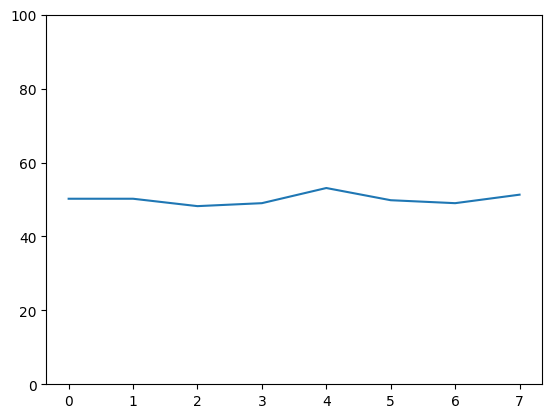

In [39]:
plt.plot(señal)
plt.ylim(0,100)

In [49]:
scaler_3 = MinMaxScaler()

In [50]:
fitted_scaler_3 = scaler_3.fit(señal.reshape(-1,1))
señal_escalada = fitted_scaler_3.transform(señal.reshape(-1,1))

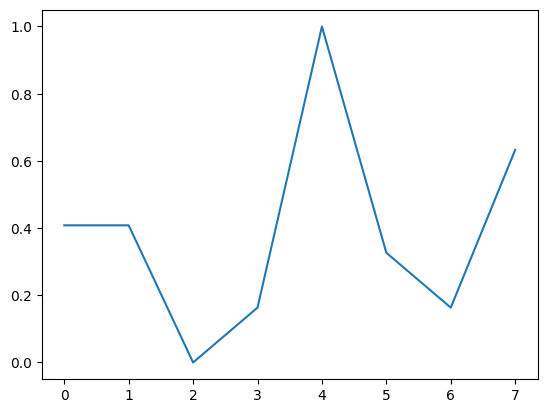

In [52]:
plt.plot(señal_escalada)

## Normalizacion

In [53]:
from sklearn import preprocessing

In [55]:
X = [[1., -1., 2.],
     [2., 0., 0.],
     [0., 1., -1.]]

In [56]:
x_normalized_l1 = preprocessing.normalize(X, norm="l1")
x_normalized_l1

array([[ 0.25, -0.25,  0.5 ],
       [ 1.  ,  0.  ,  0.  ],
       [ 0.  ,  0.5 , -0.5 ]])

In [58]:
x_normalized_l2 = preprocessing.normalize(X, norm="l2")
x_normalized_l2

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])